In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# 1 Data Loading

In [3]:
all_data = pd.read_csv('../data/dataset.csv')
all_data.head()

,floor,number_of_storeys,ceiling_height,target_price,total_area,living_area,kitchen_area,district,near_the_subway,number_of_rooms,house_type,bathroom,balcony,year_built
0,9.0,25.0,2.70,300000.0,93.2,64.7,NaN,Sovetsky,Yes,3,brick,2,Loggia,2016.0
1,10.0,25.0,2.70,51000.0,32.3,25.7,NaN,Oktyabrsky,Yes,1,frame-block,combined,Loggia,2021.0
2,2.0,5.0,2.68,135000.0,125.2,122.8,NaN,Sovetsky,No,3,frame-block,2,Loggia,2019.0
3,7.0,12.0,2.75,132000.0,86.1,69.8,NaN,Pervomaisky,Yes,3,frame-block,separate,Two balconies,2020.0
4,2.0,5.0,2.53,56000.0,59.9,42.6,NaN,Partizansky,Yes,3,silicate,separate,Balcony,1965.0


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11378 entries, 0 to 11377
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   floor              11179 non-null  float64
 1   number_of_storeys  11179 non-null  float64
 2   ceiling_height     9051 non-null   float64
 3   target_price       11282 non-null  float64
 4   total_area         11378 non-null  float64
 5   living_area        11170 non-null  float64
 6   kitchen_area       8837 non-null   float64
 7   district           11282 non-null  object 
 8   near_the_subway    11378 non-null  object 
 9   number_of_rooms    11378 non-null  int64  
 10  house_type         11288 non-null  object 
 11  bathroom           10162 non-null  object 
 12  balcony            11056 non-null  object 
 13  year_built         11378 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.2+ MB


In [5]:
all_data.describe()

,floor,number_of_storeys,ceiling_height,target_price,total_area,living_area,kitchen_area,number_of_rooms,year_built
count,11179.000000,11179.000000,9051.000000,11282.000000,11378.000000,11170.000000,8837.000000,11378.000000,11378.000000
mean,7.971375,15.720458,2.688682,80207.055487,59.127652,37.623380,9.427731,2.469327,2007.143259
std,6.124921,7.568802,0.145014,60695.614801,32.923354,22.784206,4.891708,4.604225,21.091163
min,1.000000,1.000000,2.100000,1000.000000,13.400000,9.000000,1.000000,0.000000,1900.000000
25%,3.000000,9.000000,2.640000,47000.000000,38.500000,23.200000,7.000000,1.000000,1999.000000
50%,6.000000,16.000000,2.700000,66000.000000,54.600000,33.400000,8.500000,2.000000,2020.000000
75%,12.000000,25.000000,2.700000,87000.000000,70.000000,46.160000,10.200000,3.000000,2021.000000
max,32.000000,32.000000,5.520000,899000.000000,583.200000,478.000000,87.600000,359.000000,2021.000000


In [6]:
all_data.describe(include=object)

,district,near_the_subway,house_type,bathroom,balcony
count,11282,11378,11288,10162,11056
unique,9,2,6,4,4
top,Oktyabrsky,Yes,frame-block,separate,Loggia
freq,5771,8820,6344,4720,7826


# 2 Remove outliers

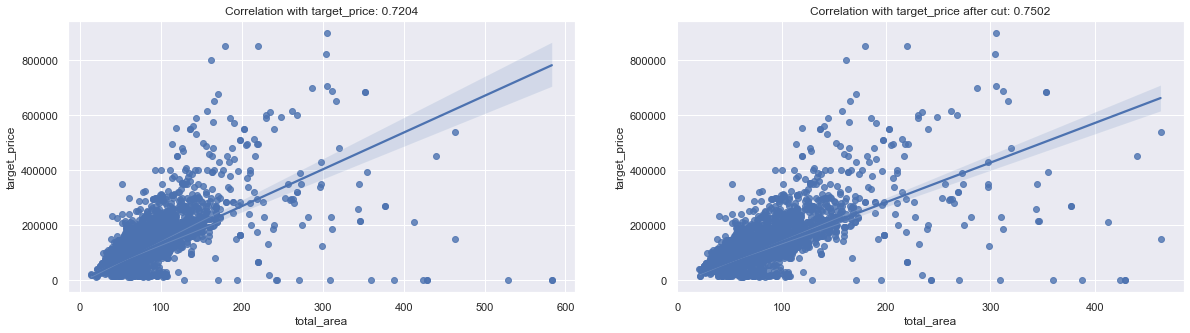

In [7]:
df = all_data[['total_area', 'target_price']]

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
plt.title('Correlation with target_price: {:6.4f}'.format(df['total_area'].corr(df['target_price'])))
sns.regplot(x='total_area', y='target_price', data=df)

df = df[(df['total_area'] > 20) & (df['total_area'] < 500)]

fig.add_subplot(122)
plt.title('Correlation with target_price after cut: {:6.4f}'.format(df['total_area'].corr(df['target_price'])))
sns.regplot(x='total_area', y='target_price', data=df)
plt.show()

In [8]:
all_data = all_data[(all_data['total_area'] > 20) & (all_data['total_area'] < 500)]
print(all_data.shape[0])

11371


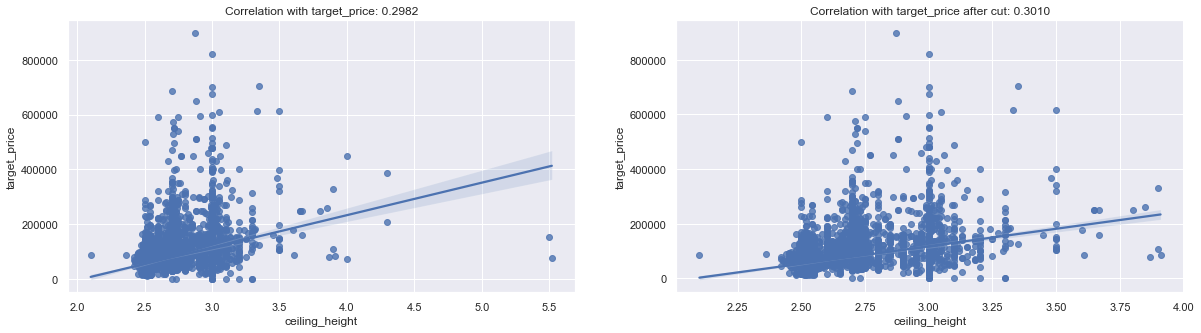

In [9]:
df = all_data[['ceiling_height', 'target_price']]

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
plt.title('Correlation with target_price: {:6.4f}'.format(df['ceiling_height'].corr(df['target_price'])))
sns.regplot(x='ceiling_height', y='target_price', data=df)

df = df[df['ceiling_height'] < 4]

fig.add_subplot(122)
plt.title('Correlation with target_price after cut: {:6.4f}'.format(df['ceiling_height'].corr(df['target_price'])))
sns.regplot(x='ceiling_height', y='target_price', data=df)
plt.show()

In [10]:
all_data = all_data[all_data['ceiling_height'].fillna(0) < 4]
print(all_data.shape[0])

11365


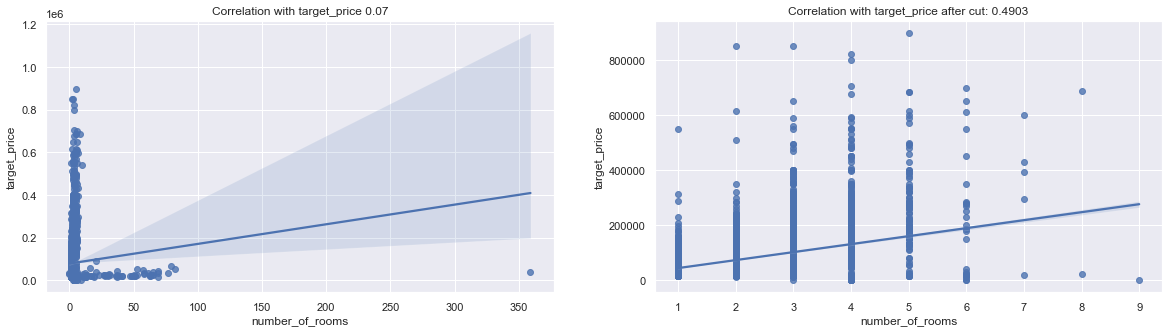

In [11]:
df = all_data[['number_of_rooms', 'target_price']]

fig = plt.figure(figsize=(20, 5))

fig.add_subplot(121)
plt.title('Correlation with target_price {:1.2f}'.format(df['number_of_rooms'].corr(df['target_price'])))
sns.regplot(x='number_of_rooms', y='target_price', data=df)

df = df[(df['number_of_rooms'] > 0) & (df['number_of_rooms'] < 10)]

fig.add_subplot(122)
plt.title('Correlation with target_price after cut: {:6.4f}'.format(df['number_of_rooms'].corr(df['target_price'])))
sns.regplot(x='number_of_rooms', y='target_price', data=df)
plt.show()

In [12]:
all_data = all_data[(all_data['number_of_rooms'] > 0) & (all_data['number_of_rooms'] < 10)]
all_data.shape[0]

11307

# 3 Handle missing values

In [13]:
all_data.apply(lambda x: x.isnull().sum())

floor                 199
number_of_storeys     199
ceiling_height       2311
target_price           96
total_area              0
living_area           208
kitchen_area         2534
district               96
near_the_subway         0
number_of_rooms         0
house_type             90
bathroom             1215
balcony               318
year_built              0
dtype: int64

In [14]:
all_data['floor'] = all_data['floor'].fillna(all_data['floor'].mode()[0])
all_data['number_of_storeys'] = all_data['number_of_storeys'].fillna(all_data['number_of_storeys'].mode()[0])
all_data['house_type'] = all_data['house_type'].fillna(all_data['house_type'].mode()[0])
all_data['district'] = all_data['district'].fillna(all_data['district'].mode()[0])
all_data['ceiling_height'] = all_data['ceiling_height'].fillna(all_data['ceiling_height'].median())
all_data['bathroom'] = all_data['bathroom'].fillna(all_data['bathroom'].mode()[0])
all_data['balcony'] = all_data['balcony'].fillna(all_data['balcony'].mode()[0])
all_data = all_data.dropna()

# Saving

In [15]:
all_data.to_csv('../data/analysed_dataset.csv', index=False)